Rutwik More

### Q1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Answer:

To perform a matrix multiplication of an (n,k) matrix and a (k,m) matrix, we will require k * m * n maultiplications. As we will form an (n,m) matrix and each term will require k multiplications. The number of additions will be (k-1) * m *n as each term will require us to add k terms (k-1 additions) and we have n * m total terms in the result.

### Q2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Two methods, one is list of lists and other is numpy arrays. Execution times are compared with the numpy.dot method.

The numpy method is much faster as unlike our method, it does not loop over the function rather multiplies the rows and columns directly and it deploys the fastest and most optimised matrix multiplication algorithms.

In [7]:
# Code to multiply two arrays of size (n,k) and (k,m) Implimentation_1
import numpy as np
import time
start = time.time()

def matmul(A,B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    ans = []
    for i in range(n):
        row = []
        for j in range(m):
            a = 0
            for l in range(k):
                a = a + (int(A[i][l]))*(int(B[l][j]))
            row.append(a)
        ans.append(row)
    return ans        

A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
B = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(matmul(A,B))

end = time.time()
print("Execution time - ", end-start)

[[30, 36, 42], [66, 81, 96], [102, 126, 150]]
Execution time -  0.0009257793426513672


In [4]:
# Implimentation_2
def matrixmul(a,b):
    p,q = a.shape
    q,r = b.shape
    c = np.zeros((p,r), dtype = a.dtype)
    for i in range(p):
        for j in range(r):
            for k in range(q):
                c[i,j] += a[i,k]*b[k,j]
    return c
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrixmul(a,b))

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


In [5]:
%%timeit
matrixmul(a,b)

8.58 µs ± 424 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
%%timeit
np.dot(a,b)

553 ns ± 22.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Q3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Answer

In this question the trivial method has a time complexity of O(n2), while the better method is we can sort the array and then take the middle value. Time complexity for this approach will be O(nlog(n)).

In [9]:
# function to get the median:
def getmedian(array):
    l = len(array)
    copyarr = np.copy(array)
    ans = 0
    for i in range(int(l/2)+1):
        max_index = 0
        max = copyarr[0]
        for j in range(l):
            if(copyarr[j] >= max):
                max = copyarr[j]
                max_index = j
        copyarr[max_index] = -1000
        ans = max
    return ans


In [10]:
input1 = np.random.randint(0,100,21)
print(input1)

[81 36 26 28 93 46 74 16 41 35 29  1  5 56 52 61 53 32 15  2 37]


In [11]:
print(getmedian(input1))

36


In [12]:
%%timeit
getmedian(input1)

16.9 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
#better method
def bettermedian(array):
    l = len(array)
    copyarr = np.copy(array)
    sortedarr = np.sort(copyarr)
    return sortedarr[int(l/2)]

In [15]:
start = time.time()
print(bettermedian(input1))
end = time.time()
print("Execution time - ", end-start)

36
Execution time -  0.002501249313354492


In [16]:
%%timeit
bettermedian(input1)

1.06 µs ± 84.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [18]:
print(np.median(input1))

36.0


In [19]:
%%timeit
np.median(input1)

5.09 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [20]:
# Checking our method and numpy method for large values of n
n = 10**5
trial = (np.random.random(n))*10.0

In [21]:
%%timeit
bettermedian(trial)

6.5 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
np.median(trial)

1.25 ms ± 33 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The numpy.median method may work slower than our method for small array size, but on array size of bigger order it works better than our method.

### Q4) What is the gradient of the following function (x2 * y + y3 * sin(x)) with respect to x and y?

Answer:

Gradient of funtion f(x) = x2*y + y3*sin(x) is delf/delx = 2xy + y3cos(x) and delf/dely = x2 + 3y2sin (x)

### Q5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [27]:
!pip install jax
!pip install jax jaxlib

  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/19/12/9233070e26993525b108f7bbfb6a1ec7c03a55cc4d906df356f1e478edad/jaxlib-0.4.23-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 MB 35.1 MB/s eta 0:00:0000:0100:01


In [28]:
# Using Jax to get the gradient

import jax.numpy as jnp
from jax import grad

g = lambda w: ((w[0])**2)*(w[1]) + ((w[1])**3)*(jnp.sin(w[0]))

a = jnp.array([1.1, 2])

def gg(w):
    return ((w[0])**2)*(w[1]) + ((w[1])**3)*(jnp.sin(w[0])) # w[0]**3 + w[1]**2

gradient = grad(g)
print(gradient(a))

AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

In [30]:
# Using sympy 
from sympy import *
x, y, z = symbols('x y z')
def function(x,y):
    return ((x)**2)*(y) + ((y)**3)*(sin(x)) # w[0]**3 + w[1]**2

diff(function(x,y),y)

x**2 + 3*y**2*sin(x)

In [31]:
diff(function(x,y),x)

2*x*y + y**3*cos(x)

### Q7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [46]:
def nested_dictionary(the_list):
    l = len(the_list)
    nest_dict = {}
    for i in range(0,l,2):
        if isinstance(the_list[i+1], list):
            new_dict = nested_dictionary(the_list[i+1])
            nest_dict[the_list[i]] = new_dict
        else:
            nest_dict[the_list[i]] = the_list[i+1]
    return nest_dict

In [49]:
list1 = [ "2022" , [ "Mech", [ "ABC" , 21110000]] , "2021" , ["Cse", ["XYZ" , 20100000] ] ]
dictionary = nested_dictionary(list1)
print(dictionary)

{'2022': {'Mech': {'ABC': 21110000}}, '2021': {'Cse': {'XYZ': 20100000}}}


### Q8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [32]:
class Student:
    def __init__(self,name,rollno):
        self.name = name
        self.rollno = rollno
        self.Subjectlist = []
    def addsubject(self, subject, marks):  ##
        self.Subjectlist.append((subject, marks)) 
    def printdetails(self):
        print(self.name ," : " , self.rollno)
        for subject in self.Subjectlist:
            print("\t", end = '')
            print("\t", end = '')
            #print(len(self.Subjectlist))
            print(subject[0], ":" , subject[1])

class Branch:
    def __init__(self,name):
        self.name = name
        self.Studentlist = []
    def addstudent(self, student):
        self.Studentlist.append(student)
    def printdetails(self):
        print("\t", end = '')
        print(self.name)
        for student in self.Studentlist:
            print("\t", end = '')
            student.printdetails()

class Years:
    def __init__(self,name):
        self.name = name
        self.Branchlist = []
    def addbranch(self, branch):
        self.Branchlist.append(branch)
    def printdetails(self):
        print("Year: ", self.name)
        for branch in self.Branchlist:
            branch.printdetails()


class College:
    Yearlist = []
    def __init__(self,name):
        self.name = name
    def addyear(self, year):
        self.Yearlist.append(year)
    def printdetails(self):
        print("College name is: ", self.name)
        for years in self.Yearlist:
            years.printdetails()


In [33]:
ABC = Student("ABC", 21110000)
ABC.addsubject("Chemistry", 87)
ABC.addsubject("Maths", 85)
Mech2021 = Branch("Mech")
Mech2021.addstudent(ABC)
y2021 = Years("2021")
y2021.addbranch(Mech2021)

iit_gn = College("IITgn")
iit_gn.addyear(y2021)

In [34]:
iit_gn.printdetails()

College name is:  IITgn
Year:  2021
	Mech
	ABC  :  21110000
		Chemistry : 87
		Maths : 85


### Q9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

Answer: 

[None, None]

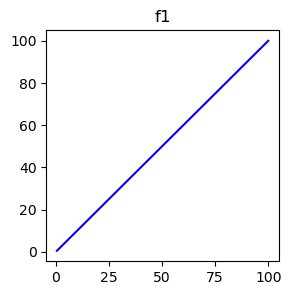

In [36]:
import matplotlib.pyplot as plt

x = np.linspace(0.5, 100, int((100-0.5)/0.5))
q7f1 = lambda x: x

fig, ax = plt.subplots()
ax.plot(x, q7f1(x), c = "blue")
ax.set(title = "f1")
fig.set(figwidth = 3, figheight = 3)

[None, None]

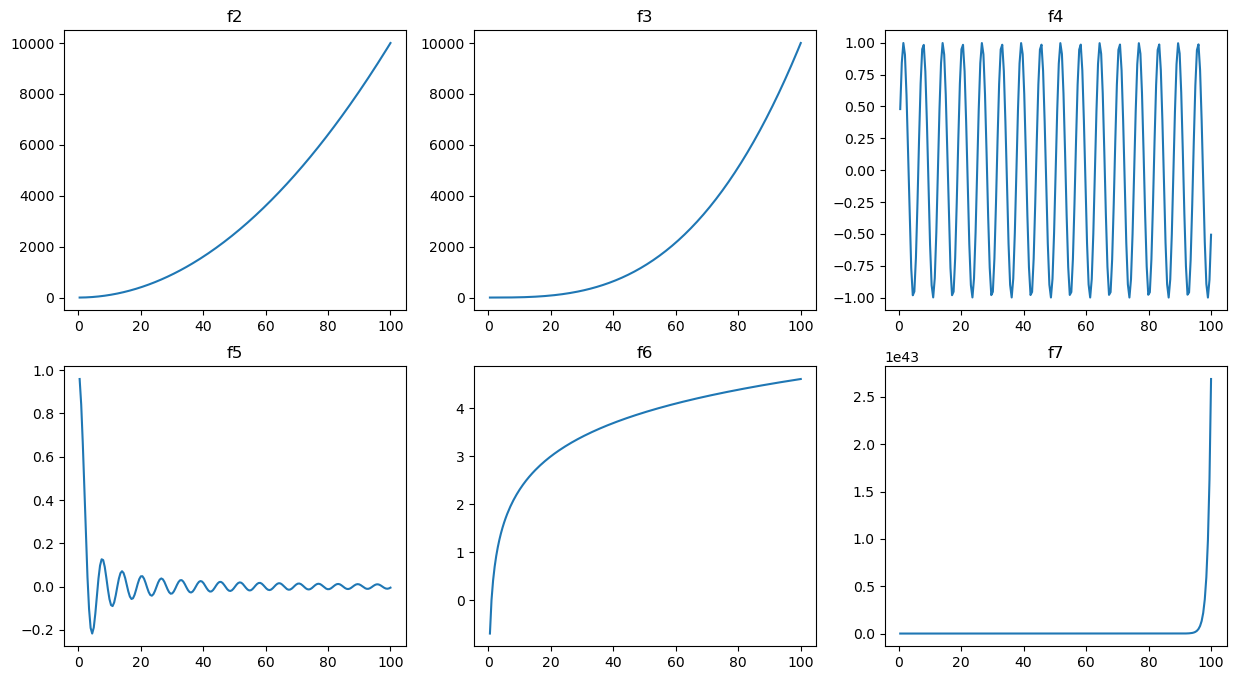

In [37]:
x = np.linspace(0.5, 100, int((100-0.5)/0.5))
q7f2 = lambda x: x**2
q7f3 = lambda x: x**3/100
q7f4 = lambda x: np.sin(x)
q7f5 = lambda x: np.sin(x)/x
q7f6 = lambda x: np.log(x)
q7f7 = lambda x: np.exp(x)

fig, ax = plt.subplots(2,3)
ax[0][0].plot(x, q7f2(x))
ax[0][0].set(title = "f2")
ax[0][1].plot(x, q7f3(x))
ax[0][1].set(title = "f3")
ax[0][2].plot(x, q7f4(x))
ax[0][2].set(title = "f4")
ax[1][0].plot(x, q7f5(x))
ax[1][0].set(title = "f5")
ax[1][1].plot(x, q7f6(x))
ax[1][1].set(title = "f6")
ax[1][2].plot(x, q7f7(x))
ax[1][2].set(title = "f7")

fig.set(figwidth= 15, figheight=8)

### Q)10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

Answer:

In [38]:
import pandas as pd
q10data = np.random.random((20,5)) + 1
df = pd.DataFrame(q10data, columns = ['a','b','c','d','e'])
print(df)

           a         b         c         d         e
0   1.535798  1.215054  1.690861  1.436574  1.754009
1   1.943934  1.093177  1.116271  1.249237  1.442767
2   1.031446  1.548048  1.779281  1.138528  1.102334
3   1.862058  1.443425  1.537632  1.022251  1.500188
4   1.737480  1.968505  1.428873  1.751409  1.689330
5   1.532951  1.350341  1.854315  1.818586  1.184570
6   1.463499  1.622921  1.484524  1.201625  1.691328
7   1.524311  1.505678  1.043943  1.222556  1.886624
8   1.427141  1.422364  1.179270  1.932340  1.464852
9   1.941640  1.729468  1.473787  1.476530  1.643545
10  1.997400  1.767671  1.757276  1.398276  1.645113
11  1.414366  1.626072  1.060757  1.973664  1.648158
12  1.790465  1.013518  1.892417  1.967430  1.475716
13  1.591175  1.826316  1.685894  1.933442  1.411423
14  1.947712  1.393856  1.946107  1.550860  1.170397
15  1.127391  1.600855  1.645122  1.629051  1.737766
16  1.266087  1.437036  1.753977  1.343363  1.767499
17  1.396221  1.104382  1.686863  1.313939  1.

In [39]:
std = df.std()
print(std)
std.idxmax()

a    0.287429
b    0.257123
c    0.284315
d    0.299494
e    0.242374
dtype: float64


'd'

In [40]:
mean = df.mean(axis = 1)
print(mean)
mean.idxmin()

0     1.526459
1     1.369077
2     1.319927
3     1.473111
4     1.715119
5     1.548153
6     1.492779
7     1.436623
8     1.485193
9     1.652994
10    1.713147
11    1.544603
12    1.627909
13    1.689650
14    1.601786
15    1.548037
16    1.513592
17    1.396857
18    1.455868
19    1.407642
dtype: float64


2

### Q)11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

### Q)12 Write a small piece of code to explain broadcasting in numpy

Answer:

Broadcasting is a numpy operation on two ojects where the smaller object (array) is broadcasted (imposed) over the larger one.

In [41]:
# Broadcasting in numpy with examples:
array1 = np.ones((3,3))
array2 = (np.arange(9)).reshape((3,3))
print(array1+array2)
print(1+array2)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


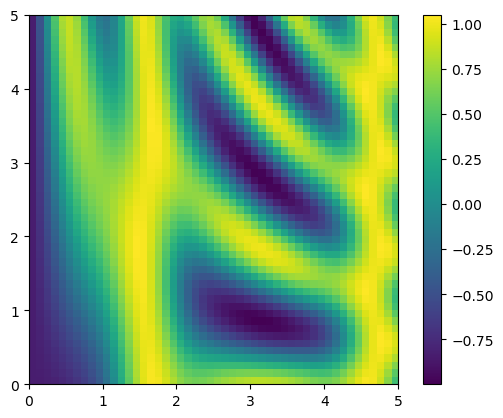

In [42]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
# here we broadcast a (50) array and a (50,1) array
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],cmap='viridis')
plt.colorbar()

### Q)13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

Answer:

In [43]:
def argmin(A):
    l = len(A)
    min = A[0]
    min_index = 0
    for i in range(l):
        if (A[i] <= min):
            min = A[i]
            min_index = i
    return min_index

In [44]:
array  = np.random.randint(0,100,20)
print(array)
print(argmin(array))

[91 60 13 14 14  7 11 65 51 73 11 53  2 92 84 20 26 22 54 14]
12


In [45]:
# argminimum using numpy method
np.argmin(array)

12